Es wird entschieden keine der Spalten zu löschen, da diese für eine spätere Analyse möglicherweise wichtig sind.
Vielmehr sollen für die Durchführung des LDAs lediglich englische Lieder im Datensatz behalten werden.

In [21]:
# Importe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from wordcloud import WordCloud

import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
import gensim.corpora as corpora

# Data Understanding mit allen Daten

In [22]:
#understanding_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\DIE_DATEN\datensatz.csv')
understanding_data = pd.read_csv('../Daten/outData.csv')
understanding_data

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
250192,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
250193,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
250194,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
250195,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


## Untersuchung Anzahl unterschiedlicher Sprachen

In [23]:
understanding_data['Language'].value_counts()

Language
en    250197
Name: count, dtype: int64

## Untersuchung Anzahl unterschiedlicher Genres

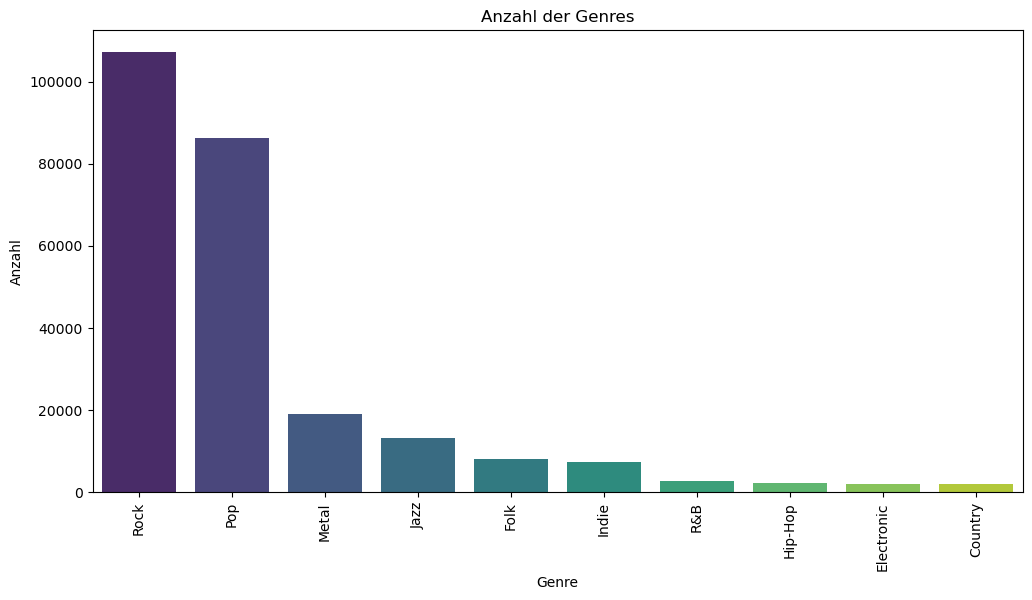

In [24]:
type1_counts = understanding_data['Genre'].value_counts().reset_index()
type1_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=type1_counts, x='Genre', y='Count', palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Anzahl')
plt.title('Anzahl der Genres')
plt.xticks(rotation=90)  # Für die bessere Lesbarkeit der Typen

plt.show()

## Sprachen im Verhältnis zum Genre

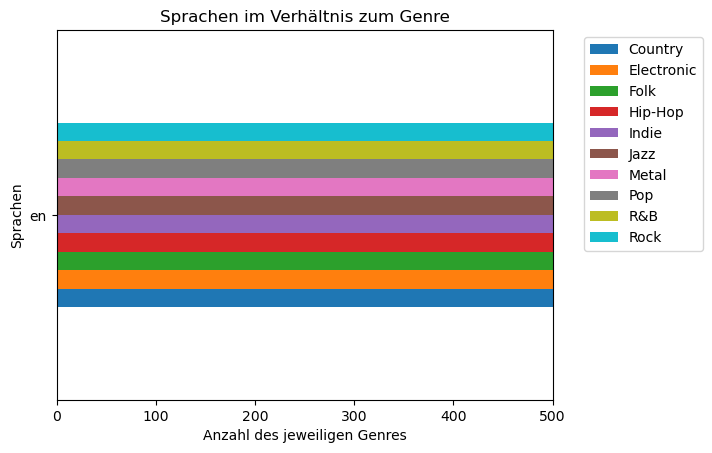

In [25]:
crosstab = pd.crosstab(understanding_data['Language'], understanding_data['Genre'])
crosstab.plot(kind='barh').legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Anzahl des jeweiligen Genres')
plt.ylabel('Sprachen')
plt.xlim(0,500)
plt.title('Sprachen im Verhältnis zum Genre')
plt.show()

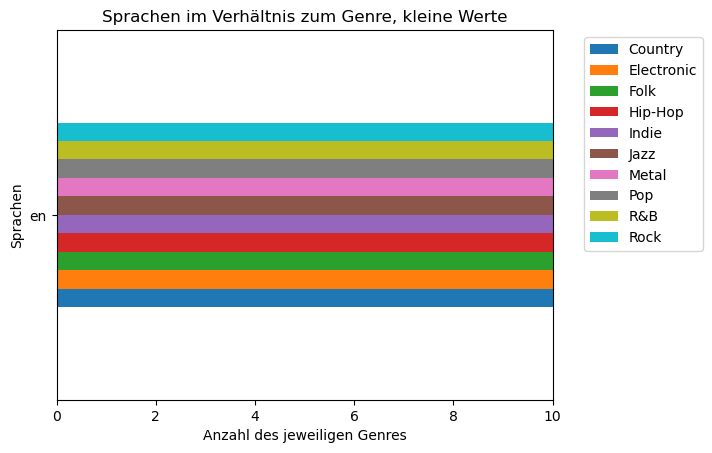

In [26]:
crosstab = pd.crosstab(understanding_data['Language'], understanding_data['Genre'])
crosstab.plot(kind='barh').legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Anzahl des jeweiligen Genres')
plt.ylabel('Sprachen')
plt.xlim(0,10)
plt.title('Sprachen im Verhältnis zum Genre, kleine Werte')
plt.show()

## Anzahl der Genres für die englische Sprache

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Rock'),
  Text(1, 0, 'Pop'),
  Text(2, 0, 'Metal'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'Folk'),
  Text(5, 0, 'Indie'),
  Text(6, 0, 'R&B'),
  Text(7, 0, 'Hip-Hop'),
  Text(8, 0, 'Electronic'),
  Text(9, 0, 'Country')])

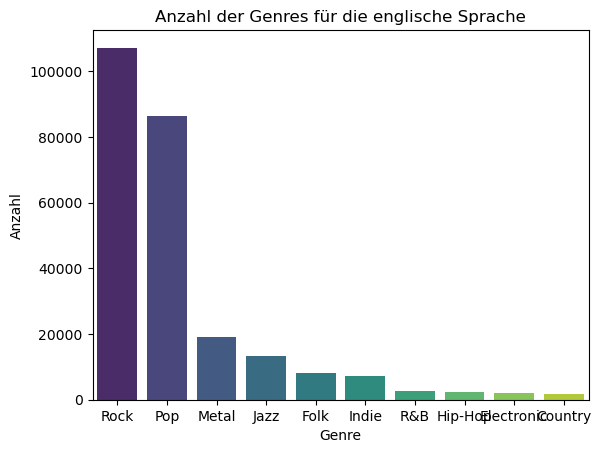

In [27]:
en_Genre = understanding_data[understanding_data['Language'] == 'en']['Genre'].value_counts().reset_index()
en_Genre.columns = ['Language', 'Anzahl Genre']
sns.barplot(data=en_Genre, x='Language', y='Anzahl Genre', palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Anzahl')
plt.title('Anzahl der Genres für die englische Sprache')
plt.xticks(rotation=0)

In [28]:
understanding_data[understanding_data['Language'] == 'en']['Genre'].value_counts()

Genre
Rock          107145
Pop            86298
Metal          19133
Jazz           13314
Folk            8169
Indie           7240
R&B             2765
Hip-Hop         2238
Electronic      2005
Country         1890
Name: count, dtype: int64

## Untersuchung der Artisten

In [29]:
artist_counts = understanding_data['Artist'].value_counts()
more_than_100_count = (artist_counts > 100).sum()
print(f'Number of artists with more than 100 occurrences: {more_than_100_count}')

understanding_data['Artist'].value_counts()

Number of artists with more than 100 occurrences: 647


Artist
elvis presley         1598
chris brown           1238
elvis costello         920
ella fitzgerald        872
the rolling stones     813
                      ... 
faithful darkness        1
radiant                  1
fakear                   1
rachid                   1
crawdad republic         1
Name: count, Length: 10701, dtype: int64

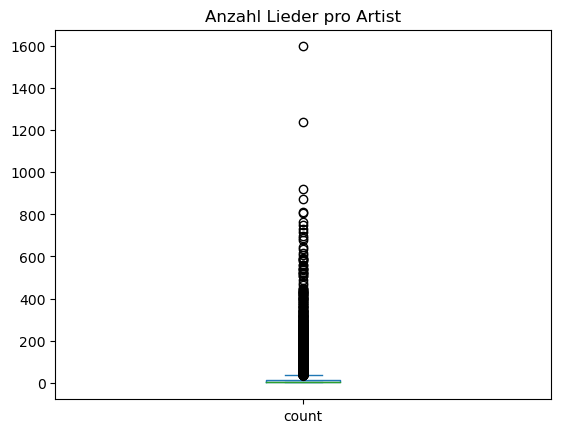

In [30]:
artist_counts = understanding_data['Artist'].value_counts()
artist_counts.plot(kind = 'box')
plt.title('Anzahl Lieder pro Artist')
plt.show()

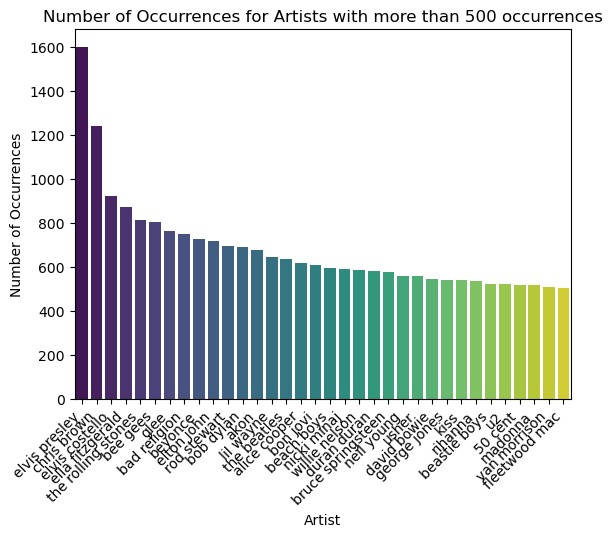

In [31]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = understanding_data['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_500_count = artist_counts[artist_counts > 500]

# Create a bar plot
sns.barplot(x=more_than_500_count.index, y=more_than_500_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Artists with more than 500 occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


## Strichprobentest für Genrezuordnung bei Künstlern

(array([0, 1]), [Text(0, 0, 'Pop'), Text(1, 0, 'Hip-Hop')])

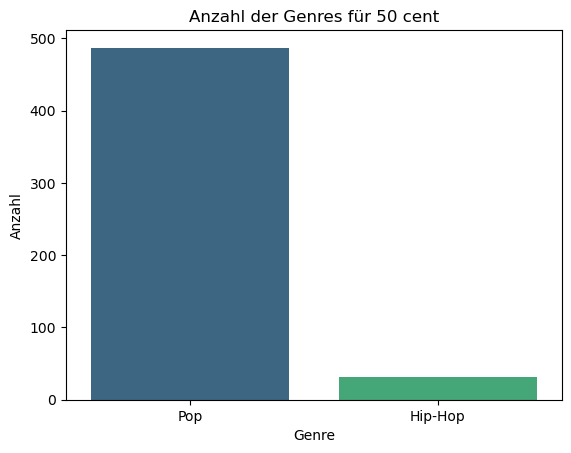

In [32]:
en_Genre = understanding_data[understanding_data['Artist'] == '50 cent']['Genre'].value_counts().reset_index()
en_Genre.columns = ['Artist', 'Anzahl Genre']
sns.barplot(data=en_Genre, x='Artist', y='Anzahl Genre', palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Anzahl')
plt.title('Anzahl der Genres für 50 cent')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Pop'), Text(1, 0, 'Rock')])

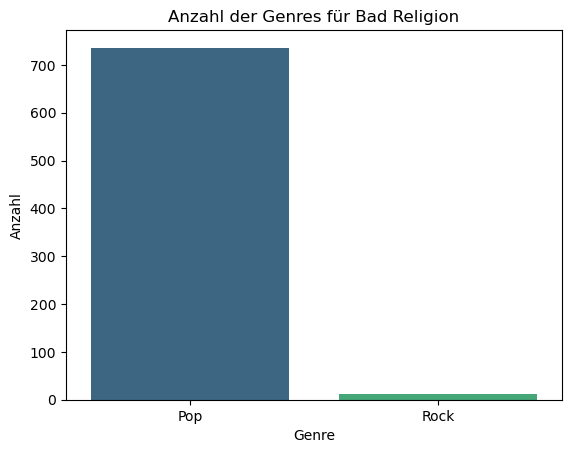

In [33]:
en_Genre = understanding_data[understanding_data['Artist'] == 'bad religion']['Genre'].value_counts().reset_index()
en_Genre.columns = ['Artist', 'Anzahl Genre']
sns.barplot(data=en_Genre, x='Artist', y='Anzahl Genre', palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Anzahl')
plt.title('Anzahl der Genres für Bad Religion')
plt.xticks(rotation=0)

## Untersuchung der Songs

In [34]:
total_rows_count = len(understanding_data['Song'])
print(f'Total number of rows in the column: {total_rows_count}')


Total number of rows in the column: 250197


In [35]:
len(understanding_data['Song'].unique())

137661

In [36]:
duplicate_rows = understanding_data.duplicated()

# Count the number of duplicate rows
duplicate_rows_count = duplicate_rows.sum()

print(f'Number of duplicate rows: {duplicate_rows_count}')


Number of duplicate rows: 20731


# Anmerkung zu den Daten

* Die meisten Lieder sind sowieso auf Englisch, die anderen können also problemlos rausgefiltert werden
* Die häufigsten Genres sind Rock und Pop, zu den anderen gibt es ein deutliches Ungleichgewicht
* Es gibt nur 10 verschiedene Genres, dabei werden auch Artisten, die anderen Genres zuzuordnen sind (siehe Beispiele von 50 cent (eigentlich Rap) und Bad Religion (eigentlich Punk)) anderen Genres zugeordet, zu denen sie eigentlich gar nicht passen, das wird die Analyse wahrscheinlich verfälschen?
* Es gibt 11152 verschiedene Künstler, davon sind von vielen deutlich mehr als 100 Lieder im Datensatz, einige haben aber nur einen Song
* In dem Datensatz gibt es über 290 000 Lieder, davon sind aber nur 164 358 unique, exakte Duplikate sind aber nur 28 477 Zeilen, da muss herausgefunden werden, was mit den anderen Zeilen los ist

# Preprocessing

In [37]:
#song_data = pd.read_csv('C:\\Users\sdo\Studienarbeit\DIE_DATEN\datensatz.csv')
song_data = pd.read_csv('../Daten/outData.csv')
song_data = song_data[(song_data['Language'] == 'en')]

song_data.to_csv("outData.csv", index=False)

song_data = pd.read_csv('./outData.csv')

song_data

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
250192,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
250193,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
250194,celine dion,sorry for love,Pop,en,Forgive me for the things That I never said to...
250195,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [38]:
# Remove the columns
song_data = song_data[['Artist','Genre', 'Lyrics']]
# Print out the first rows of papers
song_data

,Artist,Genre,Lyrics
0,12 stones,Rock,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,Rock,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,Rock,"Biting the hand that feeds you, lying to the v..."
3,12 stones,Rock,You say you know just who I am\nBut you can't ...
4,12 stones,Rock,My heart is beating faster can't control these...
...,...,...,...
250192,bobby womack,R&B,I'm the best friend he's got I'd give him the ...
250193,bad boys blue,Pop,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
250194,celine dion,Pop,Forgive me for the things That I never said to...
250195,dan bern,Indie,The day they found a cure for AIDS The day the...


## Remove punctuation/lower casing

In [39]:
# Remove punctuation
song_data['song_text_processed'] = \
song_data['Lyrics'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
song_data['song_text_processed'] = \
song_data['song_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
song_data['song_text_processed'].head()

C:\Users\anjan\AppData\Local\Temp\ipykernel_1976\4218573345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data['song_text_processed'] = \
C:\Users\anjan\AppData\Local\Temp\ipykernel_1976\4218573345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data['song_text_processed'] = \


0    it starts with pain followed by hate\nfueled b...
1    freedom\nalone again again alone\npatiently wa...
2    biting the hand that feeds you lying to the vo...
3    you say you know just who i am\nbut you can't ...
4    my heart is beating faster can't control these...
Name: song_text_processed, dtype: object

## Analyse für ein Lied

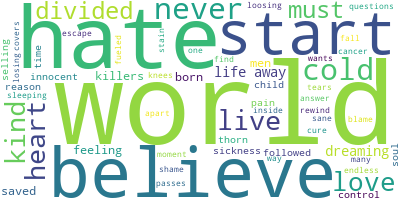

In [40]:
# Join the different processed titles together.
lyrics_for_one_song = song_data.loc[0, 'song_text_processed']
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(lyrics_for_one_song)
# Visualize the word cloud
wordcloud.to_image()

In [41]:
song_data

,Artist,Genre,Lyrics,song_text_processed
0,12 stones,Rock,"It starts with pain, followed by hate\nFueled ...",it starts with pain followed by hate\nfueled b...
1,12 stones,Rock,Freedom!\nAlone again again alone\nPatiently w...,freedom\nalone again again alone\npatiently wa...
2,12 stones,Rock,"Biting the hand that feeds you, lying to the v...",biting the hand that feeds you lying to the vo...
3,12 stones,Rock,You say you know just who I am\nBut you can't ...,you say you know just who i am\nbut you can't ...
4,12 stones,Rock,My heart is beating faster can't control these...,my heart is beating faster can't control these...
...,...,...,...,...
250192,bobby womack,R&B,I'm the best friend he's got I'd give him the ...,i'm the best friend he's got i'd give him the ...
250193,bad boys blue,Pop,"Bad Boys Blue ""I Totally Miss You"" I did you w...","bad boys blue ""i totally miss you"" i did you w..."
250194,celine dion,Pop,Forgive me for the things That I never said to...,forgive me for the things that i never said to...
250195,dan bern,Indie,The day they found a cure for AIDS The day the...,the day they found a cure for aids the day the...


# Data Understanding für vorverarbeitete (basically nur den englischen) Daten

## Genre

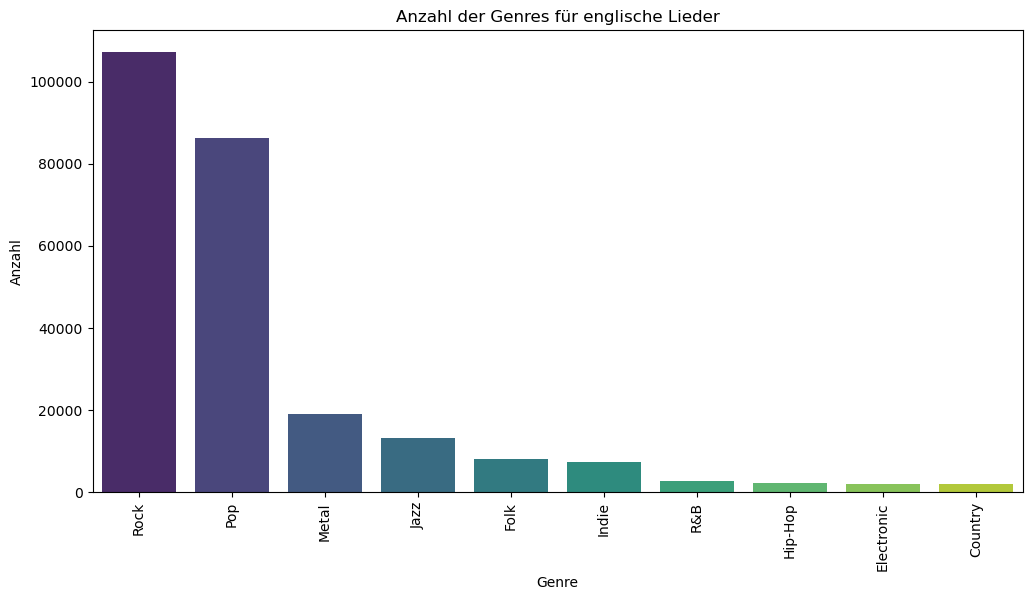

In [42]:
genre_counts = song_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts, x='Genre', y='Count', palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Anzahl')
plt.title('Anzahl der Genres für englische Lieder')
plt.xticks(rotation=90)  # Für die bessere Lesbarkeit der Typen

plt.show()

In [43]:
song_data['Genre'].value_counts()

Genre
Rock          107145
Pop            86298
Metal          19133
Jazz           13314
Folk            8169
Indie           7240
R&B             2765
Hip-Hop         2238
Electronic      2005
Country         1890
Name: count, dtype: int64

## Artisten

In [44]:
artist_counts = song_data['Artist'].value_counts()
more_than_100_count = (artist_counts > 100).sum()
print(f'Number of artists with more than 100 occurrences: {more_than_100_count}')

understanding_data['Artist'].value_counts()

Number of artists with more than 100 occurrences: 647


Artist
elvis presley         1598
chris brown           1238
elvis costello         920
ella fitzgerald        872
the rolling stones     813
                      ... 
faithful darkness        1
radiant                  1
fakear                   1
rachid                   1
crawdad republic         1
Name: count, Length: 10701, dtype: int64

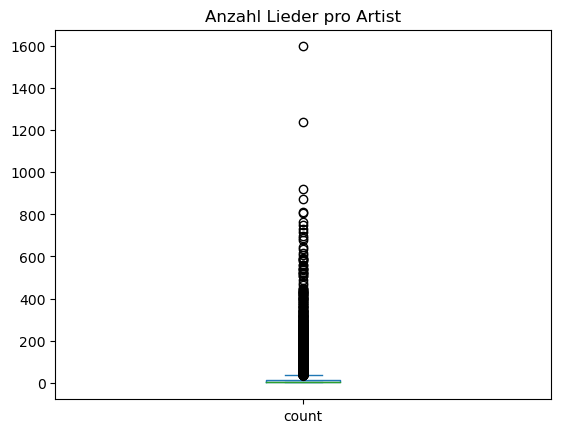

In [45]:
artist_counts = understanding_data['Artist'].value_counts()
artist_counts.plot(kind = 'box')
plt.title('Anzahl Lieder pro Artist')
plt.show()

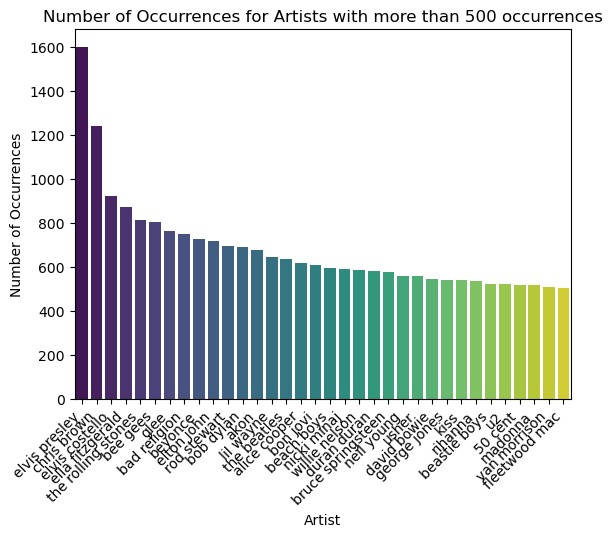

In [46]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 500]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Artists with more than 500 occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [47]:
song_data[song_data['Artist'] == 'elvis presley']['Genre'].value_counts()

Genre
Rock    1598
Name: count, dtype: int64

In [48]:
# Genres pro Artist

# Assuming 'Artist' and 'Genre' are column names in your DataFrame
artist_genre_counts = song_data.groupby('Artist')['Genre'].nunique()

# Select artists with more than one genre
artists_with_multiple_genres = artist_genre_counts[artist_genre_counts > 1]

# Display artists along with their corresponding genres
for artist in artists_with_multiple_genres.index:
    genres = song_data.loc[song_data['Artist'] == artist, 'Genre'].unique()
    print(f"Artist: {artist}, Genres: {', '.join(genres)}")


Artist: 2 chainz, Genres: Pop, Hip-Hop
Artist: 50 cent, Genres: Pop, Hip-Hop
Artist: a day to remember, Genres: Metal, Pop
Artist: a ha, Genres: Rock, Pop
Artist: aaron tippin, Genres: Rock, Country
Artist: aaron watson, Genres: Rock, Country
Artist: ace hood, Genres: Pop, Hip-Hop
Artist: adventure club, Genres: Pop, Electronic
Artist: afi, Genres: Pop, Rock
Artist: aiden, Genres: Pop, Rock
Artist: aimee mann, Genres: Pop, Rock
Artist: al martino, Genres: Pop, Jazz
Artist: alex clare, Genres: Rock, Pop
Artist: alex g, Genres: Indie, Electronic
Artist: alexi murdoch, Genres: Folk, Indie
Artist: alexz johnson, Genres: Pop, Rock
Artist: alien ant farm, Genres: Metal, Rock
Artist: alison krauss, Genres: Folk, Country
Artist: alison moyet, Genres: Pop, Rock
Artist: alison wonderland, Genres: Indie, Pop
Artist: alkaline trio, Genres: Pop, Rock
Artist: alle farben, Genres: Pop, Electronic
Artist: allen toussaint, Genres: Rock, R&B
Artist: allison moorer, Genres: Folk, Country
Artist: allstar 

## Textuntersuchung

In [49]:
# Assuming 'Text_Column' is the name of the column containing the text
song_data['Text_Length'] = song_data['song_text_processed'].str.len()

# Display the DataFrame with the added 'Text_Length' column
print(song_data[['song_text_processed', 'Text_Length']])

song_data


                                      song_text_processed  Text_Length
0       it starts with pain followed by hate\nfueled b...         1606
1       freedom\nalone again again alone\npatiently wa...         1181
2       biting the hand that feeds you lying to the vo...          742
3       you say you know just who i am\nbut you can't ...          765
4       my heart is beating faster can't control these...         1640
...                                                   ...          ...
250192  i'm the best friend he's got i'd give him the ...         1487
250193  bad boys blue "i totally miss you" i did you w...         1272
250194  forgive me for the things that i never said to...         1379
250195  the day they found a cure for aids the day the...          989
250196  fourth of july has come it's custom that we go...         1107

[250197 rows x 2 columns]


,Artist,Genre,Lyrics,song_text_processed,Text_Length
0,12 stones,Rock,"It starts with pain, followed by hate\nFueled ...",it starts with pain followed by hate\nfueled b...,1606
1,12 stones,Rock,Freedom!\nAlone again again alone\nPatiently w...,freedom\nalone again again alone\npatiently wa...,1181
2,12 stones,Rock,"Biting the hand that feeds you, lying to the v...",biting the hand that feeds you lying to the vo...,742
3,12 stones,Rock,You say you know just who I am\nBut you can't ...,you say you know just who i am\nbut you can't ...,765
4,12 stones,Rock,My heart is beating faster can't control these...,my heart is beating faster can't control these...,1640
...,...,...,...,...,...
250192,bobby womack,R&B,I'm the best friend he's got I'd give him the ...,i'm the best friend he's got i'd give him the ...,1487
250193,bad boys blue,Pop,"Bad Boys Blue ""I Totally Miss You"" I did you w...","bad boys blue ""i totally miss you"" i did you w...",1272
250194,celine dion,Pop,Forgive me for the things That I never said to...,forgive me for the things that i never said to...,1379
250195,dan bern,Indie,The day they found a cure for AIDS The day the...,the day they found a cure for aids the day the...,989


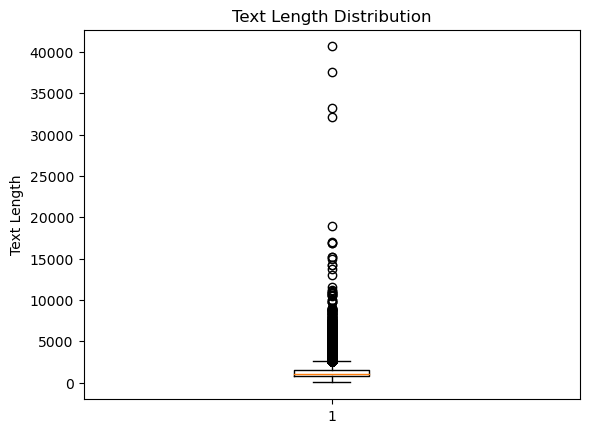

In [50]:
# Assuming 'Text_Length' is the name of the newly created column
if 'Text_Length' in song_data.columns:
    # Plot a box plot
    plt.boxplot(song_data['Text_Length'])
    plt.title('Text Length Distribution')
    plt.ylabel('Text Length')
    plt.show()
else:
    print("The 'Text_Length' column does not exist in the DataFrame.")


In [51]:
song_data['Text_Length'].value_counts().sort_index()

Text_Length
6        1
7        1
8        1
11       1
12       4
        ..
18882    1
32167    1
33214    1
37613    1
40661    1
Name: count, Length: 4981, dtype: int64

In [52]:
less_than_20_count = song_data[song_data['Text_Length'] < 20].shape[0]
more_than_20_count = song_data[song_data['Text_Length'] >= 20].shape[0]
more_than_2000_count = song_data[song_data['Text_Length'] >= 2000].shape[0]

print(f'Anzahl der Lieder mit Sontext kürzer als 20 Zeichen: {less_than_20_count}')
print(f'Anzahl der Lieder mit Sontext länger als 20 Zeichen: {more_than_20_count}')
print(f'Anzahl der Lieder mit Sontext länger als 2000 Zeichen: {more_than_2000_count}')

Anzahl der Lieder mit Sontext kürzer als 20 Zeichen: 41
Anzahl der Lieder mit Sontext länger als 20 Zeichen: 250156
Anzahl der Lieder mit Sontext länger als 2000 Zeichen: 28569


In [53]:
song_data[song_data['Text_Length'] > 9000].sort_values(by='Text_Length')

,Artist,Genre,Lyrics,song_text_processed,Text_Length
94789,miley cyrus,Pop,Intro\nE||------------h3-----------------3--|\...,intro\ne||------------h3-----------------3--|\...,9072
18979,guns n roses,Rock,Intro: Clean Electric\nAm Dm G\n|-----|-------...,intro: clean electric\nam dm g\n|-----|-------...,9775
74477,the game,Pop,[The Game talking]\nWhat the fuck is all this ...,[the game talking]\nwhat the fuck is all this ...,9781
74496,the game,Pop,[The Game talking]\nWhat the fuck is all this ...,[the game talking]\nwhat the fuck is all this ...,9781
11335,david bowie,Rock,1\n2\n1-2-2\nShiruetto ya kage ga kakumei o mi...,1\n2\n1-2-2\nshiruetto ya kage ga kakumei o mi...,9992
1210,aerosmith,Rock,intro(w/volume pedal or r.hand pinky)-\n< < < ...,intro(w/volume pedal or rhand pinky)-\n< < < <...,9993
5231,black sabbath,Rock,Written by Iommi/Ward/Butler/Osbourne\nWarner ...,written by iommi/ward/butler/osbourne\nwarner ...,10446
3259,avenged sevenfold,Metal,INTRO---\nINTRO\n-----------------------------...,intro---\nintro\n-----------------------------...,10603
74628,the game,Pop,"One Blood - (feat\nJim Jones, Snoop Dogg, Nas,...",one blood - (feat\njim jones snoop dogg nas ti...,10650
74474,the game,Pop,"One Blood - (feat\nJim Jones, Snoop Dogg, Nas,...",one blood - (feat\njim jones snoop dogg nas ti...,10650


In [54]:
song_data[song_data['Text_Length'] < 50].sort_values(by='Text_Length')

,Artist,Genre,Lyrics,song_text_processed,Text_Length
100481,thalia,Pop,thalia,thalia,6
177607,mystikal,Pop,\n\nHey,\n\nhey,7
211788,bloodhound gang,Metal,Coughing....,coughing,8
111847,primus,Rock,Lermaninoff,lermaninoff,11
49305,the flaming lips,Rock,THE OBSERVER.,the observer,12
...,...,...,...,...,...
130413,u2,Rock,Where do we go from here\nWhere do we go from ...,where do we go from here\nwhere do we go from ...,49
134829,throwing muses,Pop,"Dovey, I'll take you down\nRemember I see behi...",dovey i'll take you down\nremember i see behin...,49
148036,kraftwerk,Rock,It's more fun to compute\nIt's more fun to com...,it's more fun to compute\nit's more fun to com...,49
202634,the monkees,Rock,"Hup, hup, hup\n\nWhat, are you kidding me? Psy...",hup hup hup\n\nwhat are you kidding me psycho-...,49


## Künstler pro Genre

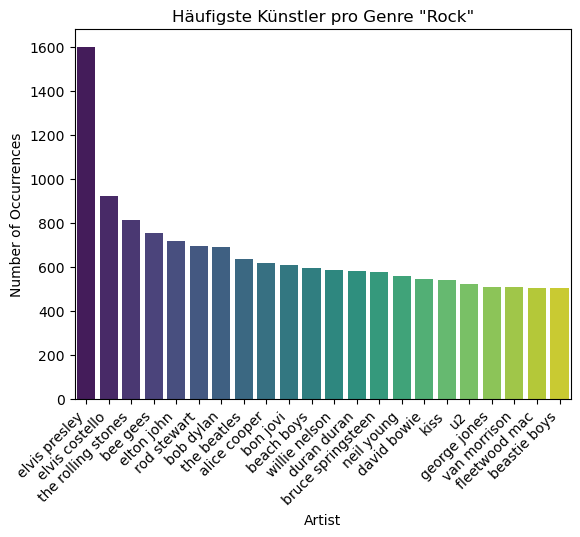

In [55]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data[song_data['Genre'] == 'Rock']['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 500]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Häufigste Künstler pro Genre "Rock"')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

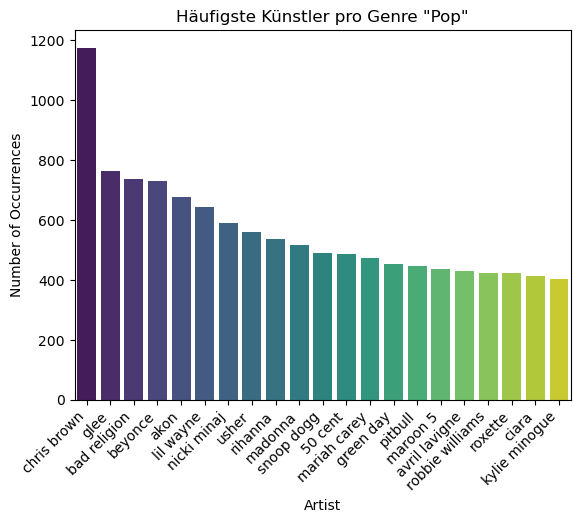

In [56]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data[song_data['Genre'] == 'Pop']['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 400]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Häufigste Künstler pro Genre "Pop"')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

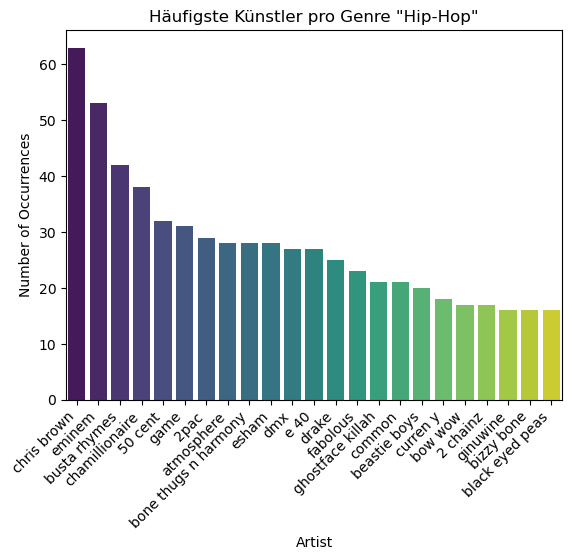

In [57]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data[song_data['Genre'] == 'Hip-Hop']['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 15]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Häufigste Künstler pro Genre "Hip-Hop"')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

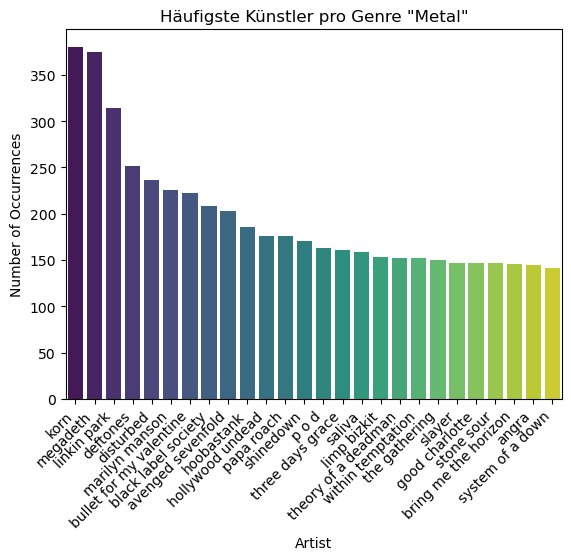

In [58]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data[song_data['Genre'] == 'Metal']['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 140]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Häufigste Künstler pro Genre "Metal"')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

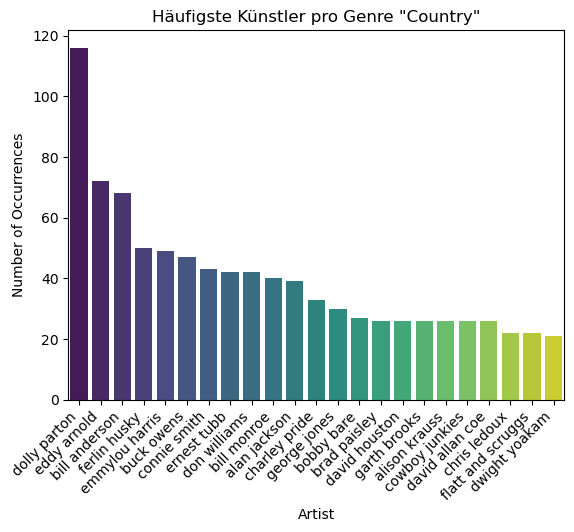

In [59]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data[song_data['Genre'] == 'Country']['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 20]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Häufigste Künstler pro Genre "Country"')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

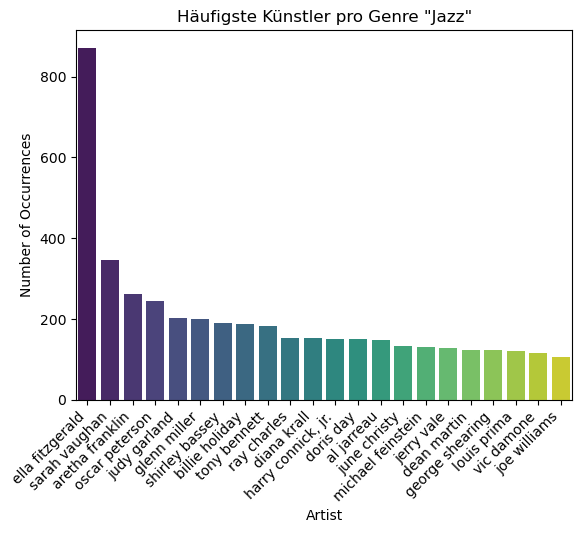

In [60]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data[song_data['Genre'] == 'Jazz']['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 100]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Häufigste Künstler pro Genre "Jazz"')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

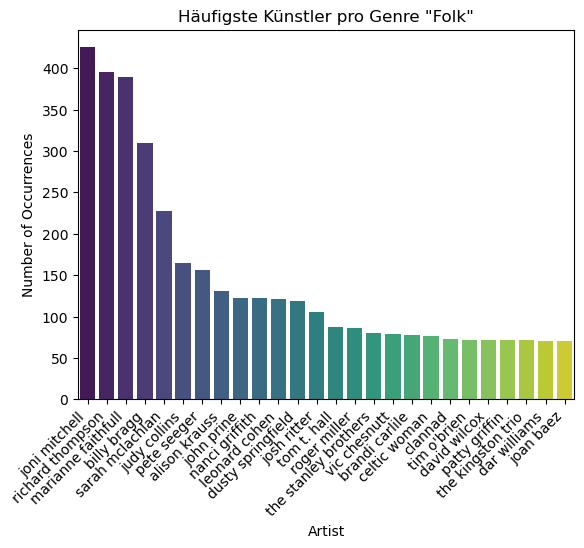

In [61]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data[song_data['Genre'] == 'Folk']['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 70]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Häufigste Künstler pro Genre "Folk"')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

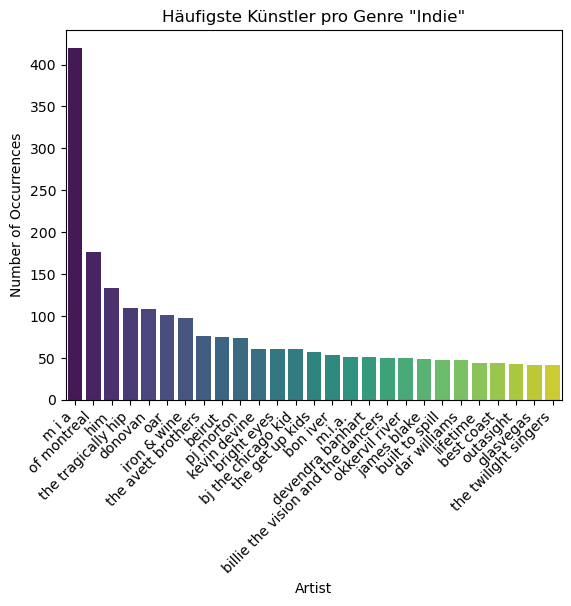

In [62]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data[song_data['Genre'] == 'Indie']['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 40]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Häufigste Künstler pro Genre "Indie"')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

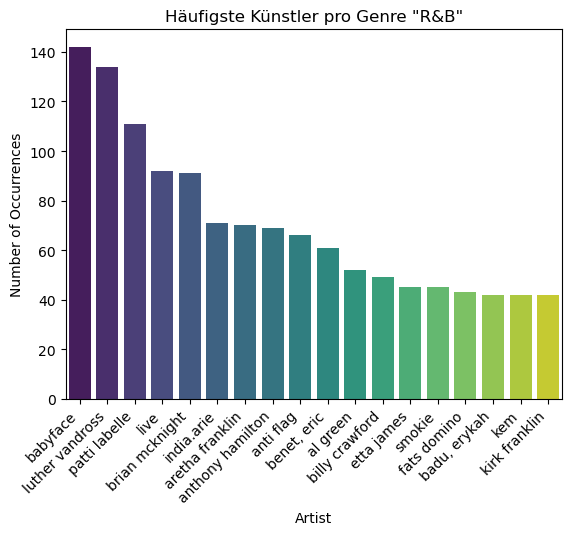

In [63]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data[song_data['Genre'] == 'R&B']['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 40]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Häufigste Künstler pro Genre "R&B"')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

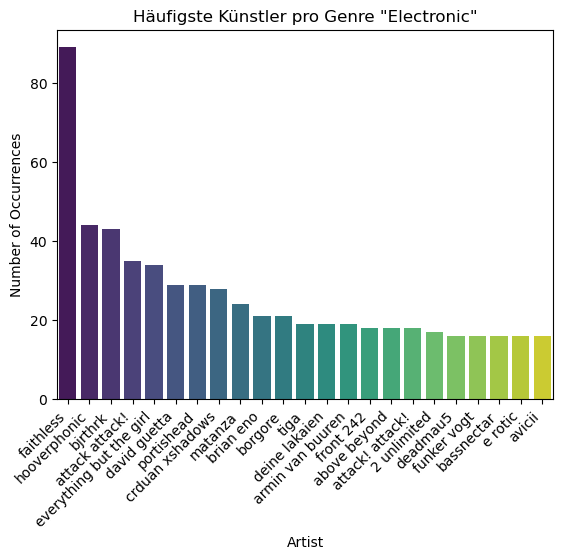

In [64]:
# Assuming 'Artist' is the index after using value_counts
artist_counts = song_data[song_data['Genre'] == 'Electronic']['Artist'].value_counts()

# Select artists with more than 400 occurrences
more_than_600_count = artist_counts[artist_counts > 15]

# Create a bar plot
sns.barplot(x=more_than_600_count.index, y=more_than_600_count.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Artist')
plt.ylabel('Number of Occurrences')
plt.title('Häufigste Künstler pro Genre "Electronic"')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

## Anmerkung zu den vorverabreiteten Daten


* Die Verteilung bei den englischen Liedern ist ziemlich ähnlich zu der im unbearbeiteten Datensatz, es bestehen die gleichen Probleme
* Neu und auffällig ist die Unterscuchung des vorverarbeiteten Textes: Es gibt einige Ausreißer nach oben und unten, hier muss noch geschaut werden, ob diese Sinn machen und ab wann sie rausgelöscht werden sollen.

# Data Cleaing

Zu Cleanen sind:
* Alle Lieder kürzer als 50 Zeichen
* Alle Lieder länger als 9000 Zeichen
* Duplikate
* Ggf. bei den häufigsten Künstlern die Genres richtig zuordnen

In [65]:
toClean = song_data['Text_Length'] < 50

song_data = song_data.drop(song_data[toClean].index)

toClean = song_data['Text_Length'] > 9000

song_data = song_data.drop(song_data[toClean].index)

song_data.drop_duplicates(subset=None, inplace=True)

song_data.to_csv('cleanedData.csv', index=False)

print(song_data)


                  Artist  Genre   
0              12 stones   Rock  \
1              12 stones   Rock   
2              12 stones   Rock   
3              12 stones   Rock   
4              12 stones   Rock   
...                  ...    ...   
250192      bobby womack    R&B   
250193     bad boys blue    Pop   
250194       celine dion    Pop   
250195          dan bern  Indie   
250196  crawdad republic    Pop   

                                                   Lyrics   
0       It starts with pain, followed by hate\nFueled ...  \
1       Freedom!\nAlone again again alone\nPatiently w...   
2       Biting the hand that feeds you, lying to the v...   
3       You say you know just who I am\nBut you can't ...   
4       My heart is beating faster can't control these...   
...                                                   ...   
250192  I'm the best friend he's got I'd give him the ...   
250193  Bad Boys Blue "I Totally Miss You" I did you w...   
250194  Forgive me for the thi

# Data Understanding der gecleanten Daten